In [105]:
import finnhub
# import alpaca as ap
# from alpaca.data.historical import StockHistoricalDataClient
# from alpaca.data.requests import StockBarsRequest
# from alpaca.data.timeframe import TimeFrame
import pandas as pd
from textblob import TextBlob
import datetime
from datetime import datetime, timedelta
from time import sleep

# yahoo finance
import yfinance as yf

# Setup client
finnhub_client = finnhub.Client(api_key="co3vqm9r01qqeav0rtmgco3vqm9r01qqeav0rtn0")


# Get News Data

## get news data

In [106]:
# Initial start date
start_date = '2023-04-18'

 
def get_news_df(start_date, df= pd.DataFrame()):
    start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
    for _ in range(73):
        start_date_obj += timedelta(days=1)
        start_date_new = start_date_obj.strftime('%Y-%m-%d')
        start_date_obj += timedelta(days=4)
        end_date = start_date_obj.strftime('%Y-%m-%d')
        print('Start Date :', start_date_new, 'End Date:', end_date)
        # finnhub_client = finnhub.Client(api_key='co40o9pr01qqksebf1n0co40o9pr01qqksebf1ng')
        res = finnhub_client.company_news('AAPL', _from=start_date_new, to=end_date)
        df1 = pd.DataFrame(res)
        df = pd.concat([df, df1])
        sleep(0.7)
    return df

news_df = get_news_df(start_date=start_date)

Start Date : 2023-04-11 End Date: 2023-04-15
Start Date : 2023-04-16 End Date: 2023-04-20
Start Date : 2023-04-21 End Date: 2023-04-25
Start Date : 2023-04-26 End Date: 2023-04-30
Start Date : 2023-05-01 End Date: 2023-05-05
Start Date : 2023-05-06 End Date: 2023-05-10
Start Date : 2023-05-11 End Date: 2023-05-15
Start Date : 2023-05-16 End Date: 2023-05-20
Start Date : 2023-05-21 End Date: 2023-05-25
Start Date : 2023-05-26 End Date: 2023-05-30
Start Date : 2023-05-31 End Date: 2023-06-04
Start Date : 2023-06-05 End Date: 2023-06-09
Start Date : 2023-06-10 End Date: 2023-06-14
Start Date : 2023-06-15 End Date: 2023-06-19
Start Date : 2023-06-20 End Date: 2023-06-24
Start Date : 2023-06-25 End Date: 2023-06-29
Start Date : 2023-06-30 End Date: 2023-07-04
Start Date : 2023-07-05 End Date: 2023-07-09
Start Date : 2023-07-10 End Date: 2023-07-14
Start Date : 2023-07-15 End Date: 2023-07-19
Start Date : 2023-07-20 End Date: 2023-07-24
Start Date : 2023-07-25 End Date: 2023-07-29
Start Date

In [108]:
# news_df = news_df1.copy()
news_df1 = news_df.copy()

In [109]:
def clean_news_df(news_df, start_date):
    news_df["date"] = pd.to_datetime(pd.to_datetime(news_df["datetime"], unit="s").dt.date)
    news_df.drop(news_df[news_df['date'] <= pd.to_datetime(start_date) ].index, axis=0, inplace=True)
    news_df.drop(['datetime','url','related', 'id', 'category', 'image'], axis=1, inplace=True)
    news_df = news_df.replace('Looking for stock market analysis and research with proves results? Zacks.com offers in-depth financial research with over 30years of proven results.', None)
    news_df = news_df.replace('', None)
    news_df = news_df.dropna()
    return news_df

def add_senti(news_df):
    news_df['HeadSenti'] = news_df['headline'].apply(lambda x:TextBlob(x).sentiment.polarity)
    news_df['SummSenti'] = news_df['summary'].apply(lambda x:TextBlob(x).sentiment.polarity)
    news_df = news_df.pivot_table(index=['date'], columns=['source'], values=['HeadSenti', 'SummSenti'], fill_value=0)
    news_df.columns = news_df.columns.map('_'.join)
    return news_df



In [110]:
news_df = clean_news_df(news_df, start_date)
news_df.head()

,headline,source,summary,date
0,The Strategy Of Apple's Financial Services,SeekingAlpha,Apple is building a financial services ecosyst...,2023-04-25
1,Apple developing AI-powered health coaching se...,Yahoo,Apple is said to be developing a new A.I.-powe...,2023-04-25
2,Buy AT&T For A Strong Dividend And Hidden Growth,SeekingAlpha,AT&T currently has a lot of backwards looking ...,2023-04-25
3,Apple Inc. stock outperforms competitors despi...,MarketWatch,Shares of Apple Inc. slipped 0.94% to $163.77 ...,2023-04-25
4,Why the broader U.S. stock market has ‘a lot r...,MarketWatch,A small group of technology giants have proppe...,2023-04-25


In [111]:
news_df = add_senti(news_df)
news_df.head()

,HeadSenti_CNBC,HeadSenti_DowJones,HeadSenti_Finnhub,HeadSenti_MarketWatch,HeadSenti_Nasdaq,HeadSenti_PennyStocks,HeadSenti_Reuters,HeadSenti_SeekingAlpha,HeadSenti_StockMarket,HeadSenti_Yahoo,SummSenti_CNBC,SummSenti_DowJones,SummSenti_Finnhub,SummSenti_MarketWatch,SummSenti_Nasdaq,SummSenti_PennyStocks,SummSenti_Reuters,SummSenti_SeekingAlpha,SummSenti_StockMarket,SummSenti_Yahoo
date,,,,,,,,,,,,,,,,,,,,
2023-04-22,0.068182,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.204643,0.000000,0.0,0.0,0.000000,0,0,0.000000,0.000000,0.0,0.027352
2023-04-23,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.425000,0.0,0.0,0.000000,0,0,0.000000,0.000000,0.0,0.204167
2023-04-24,0.050000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.128333,0.150000,0.0,0.0,0.000000,0,0,0.000000,0.000000,0.0,0.135361
2023-04-25,0.250000,0.0,0.0,0.034722,0.0,0.0,0.0,0.033333,0.0,0.000000,-0.033333,0.0,0.0,0.044921,0,0,0.000000,0.233864,0.0,0.090909
2023-04-26,0.025000,0.0,0.0,0.144444,0.0,0.0,0.0,0.176786,0.0,0.140181,-0.004167,0.0,0.0,0.063889,0,0,0.214286,0.075926,0.0,0.209673


# Get Stock data

## get stock data form Yahoo

In [155]:
def get_stock_df():
    stock = yf.Ticker('AAPL')
    hist = stock.history(start='2023-04-21',end=datetime.today())
    hist['date'] = pd.to_datetime(hist.index)
    hist['date'] = hist['date'].dt.date
    hist.index = pd.to_datetime(hist['date'])
    hist.drop(columns=['date'], axis=1, inplace=True)
    return hist

In [156]:
hist = get_stock_df()

In [157]:
hist = hist.sort_index()
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2023-04-21,164.173699,165.566260,163.616675,164.143860,58337300,0.0,0.0
2023-04-24,164.123960,164.720780,163.019852,164.452209,41949600,0.0,0.0
2023-04-25,164.312956,165.427005,162.860701,162.900497,48714100,0.0,0.0
2023-04-26,162.194253,164.402467,161.935639,162.890533,45498800,0.0,0.0
2023-04-27,164.312964,167.665067,164.312964,167.515869,64902300,0.0,0.0


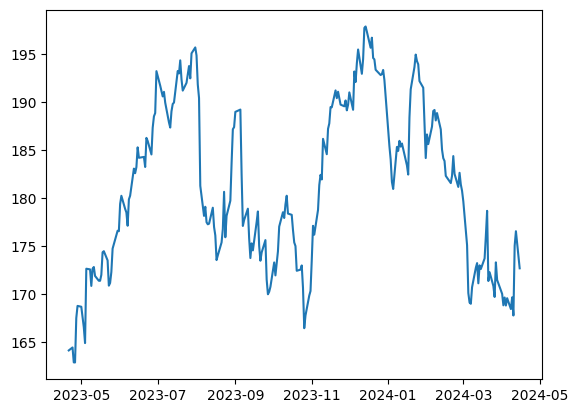

In [232]:
plt.plot(hist.index,hist['Close'])
plt.show()

In [159]:
final = pd.merge(hist, news_df, left_on=hist.index, right_on=news_df.index, how='outer')
# hist.join(df,on=hist.index)
# df1 = dff.join(hist)

In [160]:
final.head()

,key_0,Open,High,Low,Close,Volume,Dividends,Stock Splits,HeadSenti_CNBC,HeadSenti_DowJones,...,SummSenti_CNBC,SummSenti_DowJones,SummSenti_Finnhub,SummSenti_MarketWatch,SummSenti_Nasdaq,SummSenti_PennyStocks,SummSenti_Reuters,SummSenti_SeekingAlpha,SummSenti_StockMarket,SummSenti_Yahoo
0,2023-04-21,164.173699,165.566260,163.616675,164.143860,58337300.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-24,164.123960,164.720780,163.019852,164.452209,41949600.0,0.0,0.0,0.050000,0.0,...,0.150000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.135361
2,2023-04-25,164.312956,165.427005,162.860701,162.900497,48714100.0,0.0,0.0,0.250000,0.0,...,-0.033333,0.0,0.0,0.044921,0.0,0.0,0.000000,0.233864,0.0,0.090909
3,2023-04-26,162.194253,164.402467,161.935639,162.890533,45498800.0,0.0,0.0,0.025000,0.0,...,-0.004167,0.0,0.0,0.063889,0.0,0.0,0.214286,0.075926,0.0,0.209673
4,2023-04-27,164.312964,167.665067,164.312964,167.515869,64902300.0,0.0,0.0,0.156566,0.0,...,0.222222,0.0,0.0,0.227778,0.0,0.0,0.000000,0.248160,0.0,0.171918


In [161]:
# final.drop(['level_0','index'],axis=1, inplace=True)

In [162]:
final[['Open','High','Low','Close','Volume','Dividends','Stock Splits']] = final[['Open','High','Low','Close','Volume','Dividends','Stock Splits']].fillna(method='pad')

In [163]:
final = final.fillna(0.0)

In [164]:
final.head()

,key_0,Open,High,Low,Close,Volume,Dividends,Stock Splits,HeadSenti_CNBC,HeadSenti_DowJones,...,SummSenti_CNBC,SummSenti_DowJones,SummSenti_Finnhub,SummSenti_MarketWatch,SummSenti_Nasdaq,SummSenti_PennyStocks,SummSenti_Reuters,SummSenti_SeekingAlpha,SummSenti_StockMarket,SummSenti_Yahoo
0,2023-04-21,164.173699,165.566260,163.616675,164.143860,58337300.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,2023-04-24,164.123960,164.720780,163.019852,164.452209,41949600.0,0.0,0.0,0.050000,0.0,...,0.150000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.135361
2,2023-04-25,164.312956,165.427005,162.860701,162.900497,48714100.0,0.0,0.0,0.250000,0.0,...,-0.033333,0.0,0.0,0.044921,0.0,0.0,0.000000,0.233864,0.0,0.090909
3,2023-04-26,162.194253,164.402467,161.935639,162.890533,45498800.0,0.0,0.0,0.025000,0.0,...,-0.004167,0.0,0.0,0.063889,0.0,0.0,0.214286,0.075926,0.0,0.209673
4,2023-04-27,164.312964,167.665067,164.312964,167.515869,64902300.0,0.0,0.0,0.156566,0.0,...,0.222222,0.0,0.0,0.227778,0.0,0.0,0.000000,0.248160,0.0,0.171918


In [165]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   key_0                   349 non-null    datetime64[ns]
 1   Open                    349 non-null    float64       
 2   High                    349 non-null    float64       
 3   Low                     349 non-null    float64       
 4   Close                   349 non-null    float64       
 5   Volume                  349 non-null    float64       
 6   Dividends               349 non-null    float64       
 7   Stock Splits            349 non-null    float64       
 8   HeadSenti_CNBC          349 non-null    float64       
 9   HeadSenti_DowJones      349 non-null    float64       
 10  HeadSenti_Finnhub       349 non-null    float64       
 11  HeadSenti_MarketWatch   349 non-null    float64       
 12  HeadSenti_Nasdaq        349 non-null    float64   

# analyse data

In [166]:
final.columns

Index(['key_0', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'HeadSenti_CNBC', 'HeadSenti_DowJones',
       'HeadSenti_Finnhub', 'HeadSenti_MarketWatch', 'HeadSenti_Nasdaq',
       'HeadSenti_PennyStocks', 'HeadSenti_Reuters', 'HeadSenti_SeekingAlpha',
       'HeadSenti_StockMarket', 'HeadSenti_Yahoo', 'SummSenti_CNBC',
       'SummSenti_DowJones', 'SummSenti_Finnhub', 'SummSenti_MarketWatch',
       'SummSenti_Nasdaq', 'SummSenti_PennyStocks', 'SummSenti_Reuters',
       'SummSenti_SeekingAlpha', 'SummSenti_StockMarket', 'SummSenti_Yahoo'],
      dtype='object')

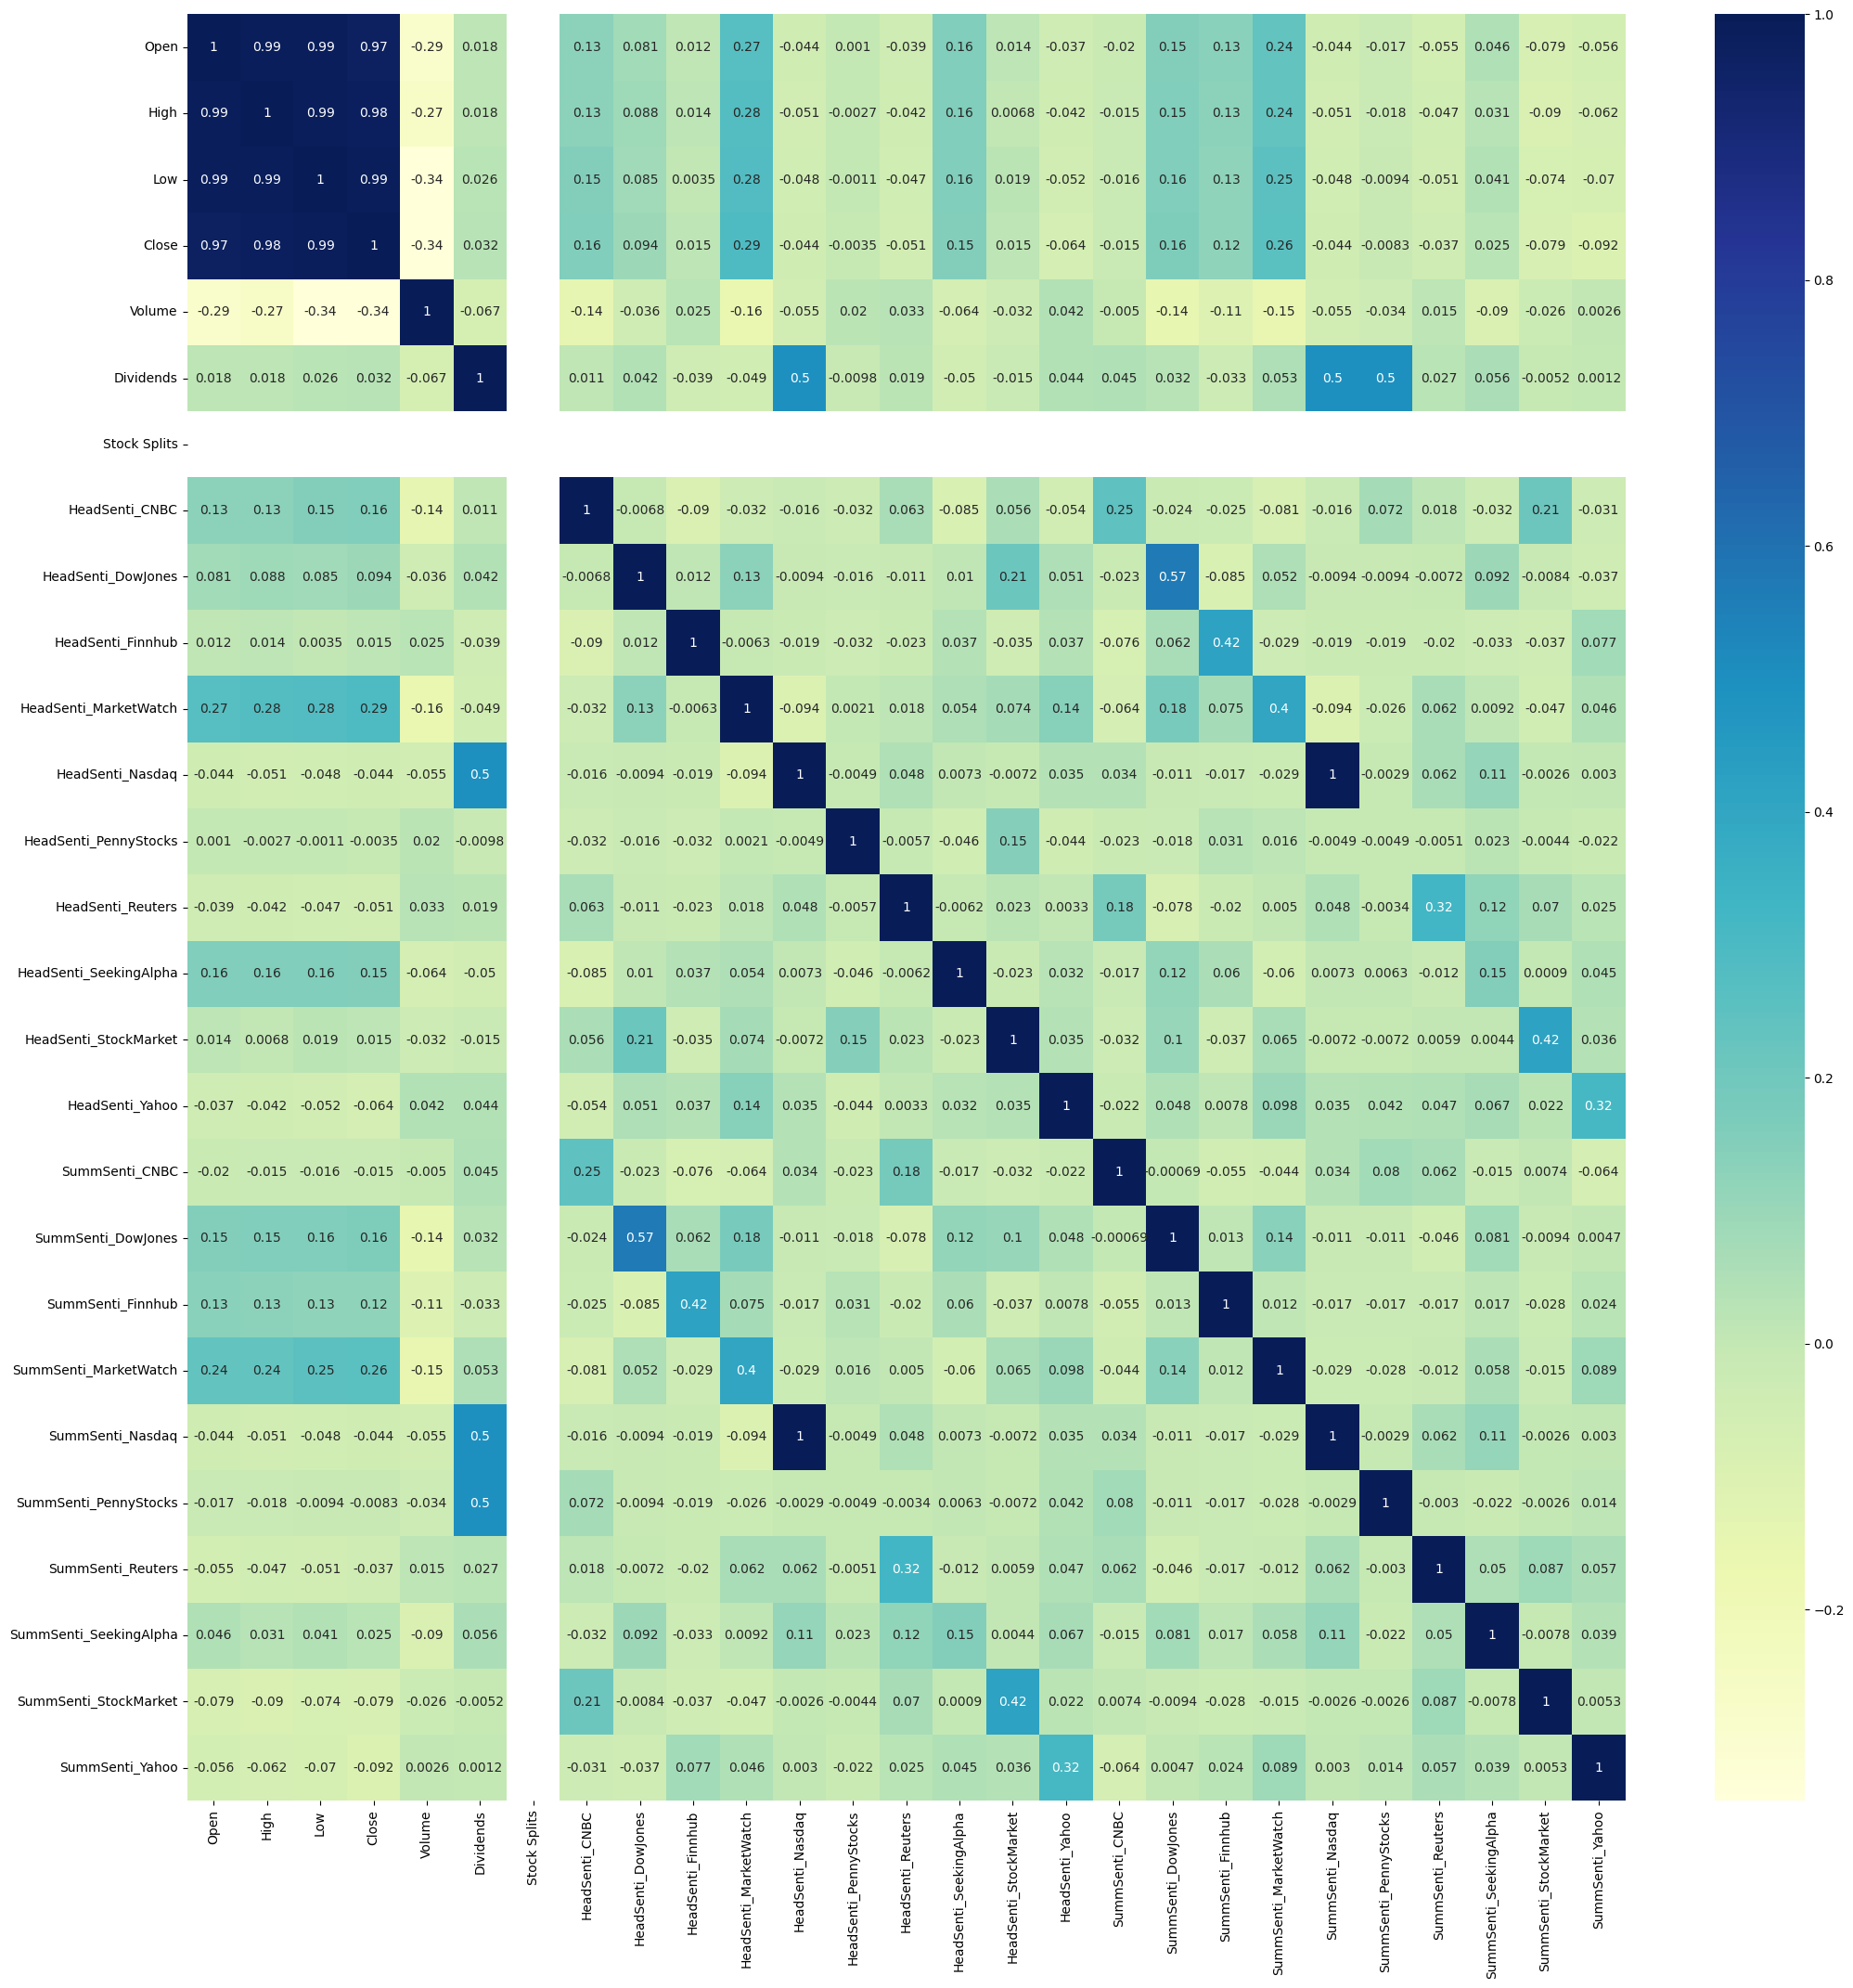

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
#Correlation of output with numerical variables
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'HeadSenti_CNBC', 'HeadSenti_DowJones', 'HeadSenti_Finnhub',
       'HeadSenti_MarketWatch', 'HeadSenti_Nasdaq', 'HeadSenti_PennyStocks',
       'HeadSenti_Reuters', 'HeadSenti_SeekingAlpha', 'HeadSenti_StockMarket',
       'HeadSenti_Yahoo', 'SummSenti_CNBC', 'SummSenti_DowJones',
       'SummSenti_Finnhub', 'SummSenti_MarketWatch', 'SummSenti_Nasdaq',
       'SummSenti_PennyStocks', 'SummSenti_Reuters', 'SummSenti_SeekingAlpha',
       'SummSenti_StockMarket', 'SummSenti_Yahoo']

fig, ax = plt.subplots(figsize=(25, 25))

# plotting correlation heatmap
dataplot = sns.heatmap(final[numerical_columns].corr(), cmap="YlGnBu", annot=True)

# creating model

In [215]:
final.head()

,key_0,Open,High,Low,Close,Volume,Dividends,Stock Splits,HeadSenti_CNBC,HeadSenti_DowJones,...,SummSenti_CNBC,SummSenti_DowJones,SummSenti_Finnhub,SummSenti_MarketWatch,SummSenti_Nasdaq,SummSenti_PennyStocks,SummSenti_Reuters,SummSenti_SeekingAlpha,SummSenti_StockMarket,SummSenti_Yahoo
0,2023-04-21,164.173699,165.566260,163.616675,164.143860,58337300.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,2023-04-24,164.123960,164.720780,163.019852,164.452209,41949600.0,0.0,0.0,0.050000,0.0,...,0.150000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.135361
2,2023-04-25,164.312956,165.427005,162.860701,162.900497,48714100.0,0.0,0.0,0.250000,0.0,...,-0.033333,0.0,0.0,0.044921,0.0,0.0,0.000000,0.233864,0.0,0.090909
3,2023-04-26,162.194253,164.402467,161.935639,162.890533,45498800.0,0.0,0.0,0.025000,0.0,...,-0.004167,0.0,0.0,0.063889,0.0,0.0,0.214286,0.075926,0.0,0.209673
4,2023-04-27,164.312964,167.665067,164.312964,167.515869,64902300.0,0.0,0.0,0.156566,0.0,...,0.222222,0.0,0.0,0.227778,0.0,0.0,0.000000,0.248160,0.0,0.171918


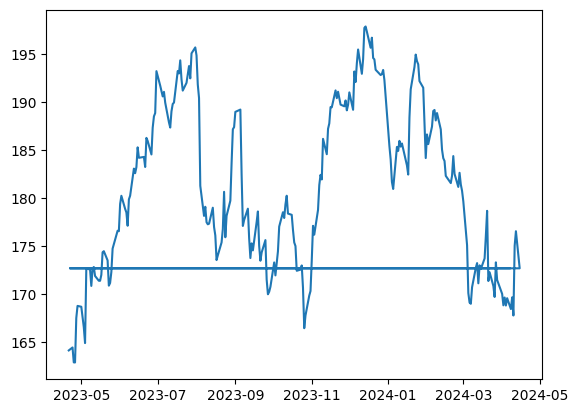

In [216]:
plt.plot(final['key_0'],final['Close'])
plt.show()

In [247]:
from sklearn import preprocessing
import numpy as np
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

dataset = min_max_scaler.fit_transform(final[['Open', 'High', 'Low', 'Volume']])
# dataset[['Dividends', 'Stock Splits', 'HeadSenti_CNBC', 'HeadSenti_DowJones', 'HeadSenti_Finnhub',
#        'HeadSenti_MarketWatch', 'HeadSenti_Nasdaq', 'HeadSenti_PennyStocks',
#        'HeadSenti_Reuters', 'HeadSenti_SeekingAlpha', 'HeadSenti_StockMarket',
#        'HeadSenti_Yahoo', 'SummSenti_CNBC', 'SummSenti_DowJones',
#        'SummSenti_Finnhub', 'SummSenti_MarketWatch', 'SummSenti_Nasdaq',
#        'SummSenti_PennyStocks', 'SummSenti_Reuters', 'SummSenti_SeekingAlpha',
#        'SummSenti_StockMarket', 'SummSenti_Yahoo']] = final[
#        'Dividends', 'Stock Splits', 'HeadSenti_CNBC', 'HeadSenti_DowJones', 'HeadSenti_Finnhub',
#        'HeadSenti_MarketWatch', 'HeadSenti_Nasdaq', 'HeadSenti_PennyStocks',
#        'HeadSenti_Reuters', 'HeadSenti_SeekingAlpha', 'HeadSenti_StockMarket',
#        'HeadSenti_Yahoo', 'SummSenti_CNBC', 'SummSenti_DowJones',
#        'SummSenti_Finnhub', 'SummSenti_MarketWatch', 'SummSenti_Nasdaq',
#        'SummSenti_PennyStocks', 'SummSenti_Reuters', 'SummSenti_SeekingAlpha',
#        'SummSenti_StockMarket', 'SummSenti_Yahoo'].to_numpy()
y_scaled = y_scaler.fit_transform(final[['Close']])
dataset = np.concatenate((dataset, y_scaled), axis=1)

/var/folders/cs/6n4wrmw5415f6gm2zphvk1p40000gn/T/ipykernel_1201/4112013751.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dataset[['Dividends', 'Stock Splits', 'HeadSenti_CNBC', 'HeadSenti_DowJones', 'HeadSenti_Finnhub',


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [234]:
# dataset = final.copy()

In [235]:
dataset.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [236]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
print(train_size)
# test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

279
279 70


In [237]:
def create_sequences(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 4]) # column with index 4 is close value which we want to predict
    return np.array(dataX), np.array(dataY)

In [238]:
x_train, y_train = create_sequences(train, look_back=15)
x_test, y_test = create_sequences(test, look_back=15)

In [239]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(263, 15, 5)
(263,)
(54, 15, 5)
(54,)


In [240]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(10, input_shape=(15, 5))) # hyperbolic tangent (tanh) activation function used by default
model.add(Dense(1)) # linear activation function is used by default
model.compile(loss='mean_squared_error', optimizer='adam')
#'adam' is a popular optimization algorithm that adapts the learning rates of each parameter individually, 
#making it well-suited for a wide range of tasks. Adam is an extension of stochastic gradient descent (SGD) 
#and is known for its efficiency in training deep neural networks.
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10)                640       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 651 (2.54 KB)
Trainable params: 651 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [241]:
model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=2)

Epoch 1/50


2024-04-16 18:14:23.797104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-16 18:14:23.916682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-16 18:14:24.012639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 - 2s - loss: 0.1651 - 2s/epoch - 57ms/step
Epoch 2/50
27/27 - 0s - loss: 0.0495 - 263ms/epoch - 10ms/step
Epoch 3/50
27/27 - 0s - loss: 0.0340 - 257ms/epoch - 10ms/step
Epoch 4/50
27/27 - 0s - loss: 0.0240 - 259ms/epoch - 10ms/step
Epoch 5/50
27/27 - 0s - loss: 0.0178 - 256ms/epoch - 9ms/step
Epoch 6/50
27/27 - 0s - loss: 0.0158 - 255ms/epoch - 9ms/step
Epoch 7/50
27/27 - 0s - loss: 0.0143 - 257ms/epoch - 10ms/step
Epoch 8/50
27/27 - 0s - loss: 0.0136 - 255ms/epoch - 9ms/step
Epoch 9/50
27/27 - 0s - loss: 0.0125 - 258ms/epoch - 10ms/step
Epoch 10/50
27/27 - 0s - loss: 0.0118 - 260ms/epoch - 10ms/step
Epoch 11/50
27/27 - 0s - loss: 0.0115 - 257ms/epoch - 10ms/step
Epoch 12/50
27/27 - 0s - loss: 0.0108 - 271ms/epoch - 10ms/step
Epoch 13/50
27/27 - 0s - loss: 0.0100 - 259ms/epoch - 10ms/step
Epoch 14/50
27/27 - 0s - loss: 0.0098 - 258ms/epoch - 10ms/step
Epoch 15/50
27/27 - 0s - loss: 0.0094 - 257ms/epoch - 10ms/step
Epoch 16/50
27/27 - 0s - loss: 0.0089 - 260ms/epoch - 10ms/step
Ep

In [242]:
# Few examples of time series evaluation
def errors(prediction,actual): 
    mae = np.mean(np.abs(prediction - actual))
    mape = np.mean(np.abs(prediction - actual)/np.abs(actual))*100
    rmse = np.mean((prediction - actual)**2)**0.5
    return({'mae':mae,'mape':mape,'rmse':rmse})

In [243]:

from sklearn.metrics import mean_squared_error
from math import sqrt
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


# invert predictions and labels
trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

errors(trainPredict[:,0],trainY[0])

# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

9/9 [==============================] - 0s 7ms/step


2024-04-16 18:14:40.409629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-16 18:14:40.450063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 16ms/step


{'mae': 1.971642381791379,
 'mape': 1.0926438888633887,
 'rmse': 2.5571508237351193}

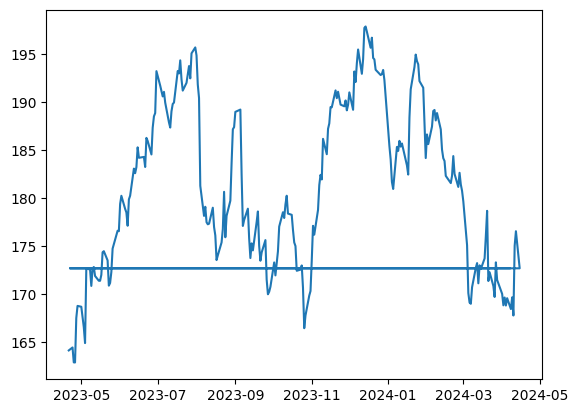

In [244]:
plt.plot(final['key_0'],final['Close'])
plt.show()

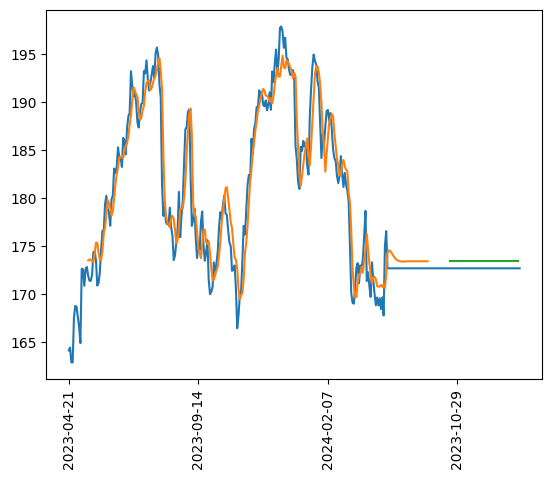

In [245]:
look_back = 15
# shift train predictions for plotting
trainPredictPlot = np.empty_like(y_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(final['Close'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xticks(range(0, len(list(final.index)), 100), list(final['key_0'].dt.date)[::100], rotation=90)
plt.show()

# new try

In [144]:
final.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,HeadSenti_CNBC,HeadSenti_DowJones,...,SummSenti_CNBC,SummSenti_DowJones,SummSenti_Finnhub,SummSenti_MarketWatch,SummSenti_Nasdaq,SummSenti_PennyStocks,SummSenti_Reuters,SummSenti_SeekingAlpha,SummSenti_StockMarket,SummSenti_Yahoo
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.101515,0.0,...,0.127946,0.0,0.0,-0.091667,0.0,0.0,0.206845,0.0,0.0,0.212105
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0.008333,0.0,...,0.015278,0.0,0.0,0.050000,0.0,0.0,0.136364,0.0,0.0,0.000000
2,165.208173,166.978722,164.680989,165.765198,52456400.0,0.0,0.0,2,0.330000,0.0,...,0.025000,0.0,0.0,0.087130,0.0,0.0,-0.020000,0.0,0.0,0.084107
3,164.173699,165.566260,163.616675,164.143860,58337300.0,0.0,0.0,3,0.250000,0.0,...,0.265000,0.0,0.0,0.130775,0.0,0.0,0.000000,0.0,0.0,0.178418
4,164.173699,165.566260,163.616675,164.143860,58337300.0,0.0,0.0,4,0.068182,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.027352


In [143]:
# final['date']=final.index

In [380]:
len(list(final.index))

355

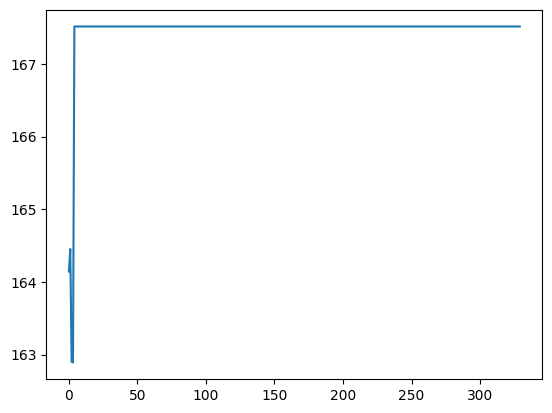

In [148]:
plt.plot(final.index, final['Close'])
# plt.xticks(range(0, len(final.index), 20), list(final.index)[::20], rotation=90)
plt.show()

In [145]:
# Scaling the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

dataset = min_max_scaler.fit_transform(final[['Open', 'High', 'Low', 'Volume', 'Dividends',
       'Stock Splits', 'HeadSenti_CNBC', 'HeadSenti_DowJones',
       'HeadSenti_Finnhub', 'HeadSenti_MarketWatch', 'HeadSenti_Nasdaq',
       'HeadSenti_PennyStocks', 'HeadSenti_Reuters', 'HeadSenti_SeekingAlpha',
       'HeadSenti_StockMarket', 'HeadSenti_Yahoo', 'SummSenti_CNBC',
       'SummSenti_DowJones', 'SummSenti_Finnhub', 'SummSenti_MarketWatch',
       'SummSenti_Nasdaq', 'SummSenti_PennyStocks', 'SummSenti_Reuters',
       'SummSenti_SeekingAlpha', 'SummSenti_StockMarket', 'SummSenti_Yahoo']])
y_scaled = y_scaler.fit_transform(final[['Close']])
dataset = np.concatenate((dataset, y_scaled), axis=1)

In [146]:
dataset[0:10]

array([[0.93427587, 0.35670892, 0.70711694, 0.713977  , 0.        ,
        0.        , 0.25      , 0.21985816, 0.2       , 0.25984252,
        0.        , 0.        , 0.23076923, 0.3559322 , 0.13043478,
        0.11593987, 0.34782609, 0.29411765, 0.19854281, 0.26605505,
        0.        , 0.        , 0.5       , 0.36721575, 0.23076923,
        0.16416287, 0.27097072],
       [0.91079933, 0.09756461, 0.45606741, 0.        , 0.        ,
        0.        , 0.325     , 0.21985816, 0.2       , 0.25984252,
        0.        , 0.        , 0.23076923, 0.3559322 , 0.13043478,
        0.22939426, 0.54347826, 0.29411765, 0.19854281, 0.26605505,
        0.        , 0.        , 0.5       , 0.36721575, 0.23076923,
        0.33806858, 0.33763629],
       [0.99999631, 0.31402169, 0.38911508, 0.29471478, 0.        ,
        0.        , 0.625     , 0.21985816, 0.2       , 0.29593176,
        0.        , 0.        , 0.23076923, 0.38983051, 0.13043478,
        0.11593987, 0.30434783, 0.29411765, 0.1985

In [394]:
dataset.shape

(355, 27)

In [395]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

248 107


In [396]:
train

array([[0.03005014, 0.00781816, 0.01920018, ..., 0.23076923, 0.1844749 ,
        0.01803427],
       [0.        , 0.        , 0.        , ..., 0.23076923, 0.1844749 ,
        0.        ],
       [0.01090253, 0.09747193, 0.04313532, ..., 0.23076923, 0.1844749 ,
        0.14067125],
       ...,
       [0.92416807, 0.88983337, 0.89357088, ..., 0.23076923, 0.36000704,
        0.88333255],
       [0.92416807, 0.88983337, 0.89357088, ..., 0.23076923, 0.22056781,
        0.88333255],
       [0.92416807, 0.88983337, 0.89357088, ..., 0.23076923, 0.37847431,
        0.88333255]])

In [397]:
def create_sequences(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 4]) # column with index 4 is close value which we want to predict
    return np.array(dataX), np.array(dataY)

In [398]:
x_train, y_train = create_sequences(train, look_back=15)
x_test, y_test = create_sequences(test, look_back=15)

In [399]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(232, 15, 27)
(232,)
(91, 15, 27)
(91,)


In [400]:
model = Sequential()
model.add(LSTM(10, input_shape=(15, 27))) # hyperbolic tangent (tanh) activation function used by default
model.add(Dense(1)) # linear activation function is used by default
model.add(Dense(1)) # linear activation function is used by default
model.compile(loss='mean_squared_error', optimizer='adam')
#'adam' is a popular optimization algorithm that adapts the learning rates of each parameter individually, 
#making it well-suited for a wide range of tasks. Adam is an extension of stochastic gradient descent (SGD) 
#and is known for its efficiency in training deep neural networks.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10)                1520      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 1533 (5.99 KB)
Trainable params: 1533 (5.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [401]:
model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=2)

Epoch 1/20


2024-04-12 14:38:19.287232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-12 14:38:19.414932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-04-12 14:38:19.532218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 - 1s - loss: 0.0384 - 1s/epoch - 60ms/step
Epoch 2/20
24/24 - 0s - loss: 0.0348 - 275ms/epoch - 11ms/step
Epoch 3/20
24/24 - 0s - loss: 0.0357 - 281ms/epoch - 12ms/step
Epoch 4/20
24/24 - 0s - loss: 0.0332 - 274ms/epoch - 11ms/step
Epoch 5/20
24/24 - 0s - loss: 0.0327 - 276ms/epoch - 12ms/step
Epoch 6/20
24/24 - 0s - loss: 0.0323 - 274ms/epoch - 11ms/step
Epoch 7/20
24/24 - 0s - loss: 0.0317 - 271ms/epoch - 11ms/step
Epoch 8/20
24/24 - 0s - loss: 0.0309 - 275ms/epoch - 11ms/step
Epoch 9/20
24/24 - 0s - loss: 0.0305 - 282ms/epoch - 12ms/step
Epoch 10/20
24/24 - 0s - loss: 0.0302 - 275ms/epoch - 11ms/step
Epoch 11/20
24/24 - 0s - loss: 0.0296 - 274ms/epoch - 11ms/step
Epoch 12/20
24/24 - 0s - loss: 0.0290 - 278ms/epoch - 12ms/step
Epoch 13/20
24/24 - 0s - loss: 0.0286 - 274ms/epoch - 11ms/step
Epoch 14/20
24/24 - 0s - loss: 0.0281 - 276ms/epoch - 12ms/step
Epoch 15/20
24/24 - 0s - loss: 0.0275 - 277ms/epoch - 12ms/step
Epoch 16/20
24/24 - 0s - loss: 0.0270 - 274ms/epoch - 11ms/step

In [402]:
# Few examples of time series evaluation
def errors(prediction,actual): 
    mae = np.mean(np.abs(prediction - actual))
    mape = np.mean(np.abs(prediction - actual)/np.abs(actual))*100
    rmse = np.mean((prediction - actual)**2)**0.5
    return({'mae':mae,'mape':mape,'rmse':rmse})

In [403]:
import math

In [408]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


# invert predictions and labels
trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

errors(trainPredict[:,0],trainY[0])

# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

1/8 [==>...........................] - ETA: 0s

3/3 [==============================] - 0s 5ms/step


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [405]:
trainPredict

array([[ 2.45866980e-02],
       [ 1.63810942e-02],
       [ 4.08748314e-02],
       [ 2.60985568e-02],
       [ 3.17140222e-02],
       [ 3.75450701e-02],
       [ 4.54367232e-03],
       [ 2.70133242e-02],
       [ 1.08471233e-02],
       [-1.81867648e-03],
       [-1.38775073e-03],
       [ 4.34623584e-02],
       [ 5.55997193e-02],
       [ 2.88615562e-03],
       [ 3.46174017e-02],
       [ 3.78219754e-01],
       [ 3.19025844e-01],
       [ 2.63121545e-01],
       [ 1.24955520e-01],
       [ 6.21645078e-02],
       [ 2.27423012e-02],
       [ 3.64839584e-02],
       [ 4.60187048e-02],
       [ 4.32302058e-02],
       [ 5.59404641e-02],
       [-5.22174537e-02],
       [-4.51486930e-03],
       [ 1.99465714e-02],
       [ 2.39883102e-02],
       [ 2.23660320e-02],
       [ 3.37854624e-02],
       [ 4.23077717e-02],
       [ 2.29976196e-02],
       [ 2.50234455e-02],
       [ 4.39796820e-02],
       [ 2.44448222e-02],
       [ 1.36188911e-02],
       [ 5.01092002e-02],
       [ 2.1

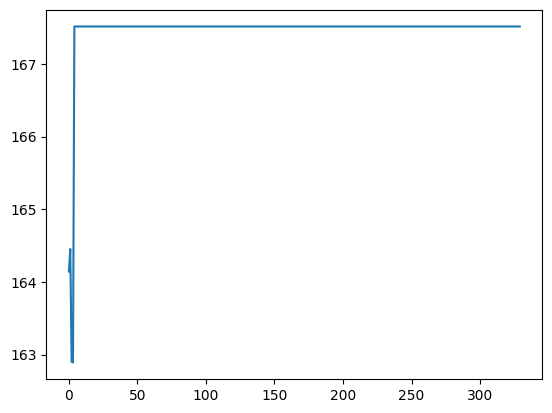

In [143]:
look_back = 15
# shift train predictions for plotting
# trainPredictPlot = np.empty_like(y_scaled)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(y_scaled)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
# plt.plot(y_scaler.inverse_transform(dataset))
plt.plot(final.index, final['Close'])
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.xticks(range(0, len(list(final.index)), 210), list(final.index)[::210], rotation=90)
plt.show()